# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#Test query
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=ff12f134f1a59b9bab3ac57c83d90f2b&units=imperial&q=portland"
weather_response = requests.get(query_url).json()
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 45.52, 'lon': -122.68},
 'dt': 1604364943,
 'id': 5746545,
 'main': {'feels_like': 58.15,
          'humidity': 65,
          'pressure': 1016,
          'temp': 59.34,
          'temp_max': 62.01,
          'temp_min': 55.99},
 'name': 'Portland',
 'sys': {'country': 'US',
         'id': 2008548,
         'sunrise': 1604328748,
         'sunset': 1604364960,
         'type': 3},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 236, 'speed': 1.14}}


In [36]:
#smallcities = ["portland","houston","seattle","new york","london","sydney","moose factory"]

updated_cities=[]
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="

#for each city in cities, grab the city, lat, lng, max temp, humidity, cloudiness,
    #wind speed, country, date & add to DF
row=1

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])    
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        updated_cities.append(city)
        print(f"Now pulling data for #{row}, {city}")
    
    except KeyError:
        print(f"unable to process #{row}, {city}")
    row = row+1

print(f"--------------------")    
print(f"All finished. {len(lat)} cities had info pulled")



    
    



Now pulling data for #1, torbay
Now pulling data for #2, nacogdoches
Now pulling data for #3, boshnyakovo
Now pulling data for #4, kresttsy
unable to process #5, taolanaro
Now pulling data for #6, barrow
Now pulling data for #7, rikitea
Now pulling data for #8, ponta do sol
Now pulling data for #9, kodiak
Now pulling data for #10, hilo
Now pulling data for #11, bambous virieux
Now pulling data for #12, union
Now pulling data for #13, ochamchira
Now pulling data for #14, ushuaia
Now pulling data for #15, bluff
Now pulling data for #16, new norfolk
Now pulling data for #17, yellowknife
Now pulling data for #18, arkhara
Now pulling data for #19, cabo san lucas
Now pulling data for #20, hasaki
Now pulling data for #21, chiredzi
Now pulling data for #22, vaini
Now pulling data for #23, punta arenas
Now pulling data for #24, brae
Now pulling data for #25, summerville
unable to process #26, cheuskiny
Now pulling data for #27, mersing
Now pulling data for #28, ahipara
Now pulling data for #29,

Now pulling data for #230, hay river
unable to process #231, barentsburg
Now pulling data for #232, campbell river
Now pulling data for #233, casa grande
Now pulling data for #234, xuanzhou
Now pulling data for #235, sept-iles
Now pulling data for #236, mut
Now pulling data for #237, souillac
Now pulling data for #238, pangnirtung
Now pulling data for #239, jining
Now pulling data for #240, queanbeyan
Now pulling data for #241, saint george
Now pulling data for #242, coos bay
Now pulling data for #243, yumen
Now pulling data for #244, tari
Now pulling data for #245, bambanglipuro
Now pulling data for #246, atambua
Now pulling data for #247, fairbanks
Now pulling data for #248, aleksandrovka
Now pulling data for #249, middelburg
Now pulling data for #250, vitim
Now pulling data for #251, barcelos
unable to process #252, tumannyy
Now pulling data for #253, san patricio
Now pulling data for #254, katsuura
Now pulling data for #255, bathsheba
Now pulling data for #256, roma
Now pulling dat

Now pulling data for #457, aripuana
Now pulling data for #458, pokrovsk
Now pulling data for #459, sambava
Now pulling data for #460, baykit
Now pulling data for #461, wanning
Now pulling data for #462, chumikan
Now pulling data for #463, krasnaya gora
Now pulling data for #464, puerto escondido
Now pulling data for #465, talakan
Now pulling data for #466, murray bridge
Now pulling data for #467, terrace
Now pulling data for #468, northam
Now pulling data for #469, mackay
Now pulling data for #470, tiznit
Now pulling data for #471, comodoro rivadavia
Now pulling data for #472, pacific grove
unable to process #473, nizhneyansk
Now pulling data for #474, rundu
Now pulling data for #475, severo-yeniseyskiy
Now pulling data for #476, zhangjiakou
Now pulling data for #477, kashary
Now pulling data for #478, kiskunmajsa
unable to process #479, hihifo
unable to process #480, ji-parana
Now pulling data for #481, sorong
Now pulling data for #482, aykino
Now pulling data for #483, fethiye
Now pu

In [37]:
len(lat)

572

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
city_dict = {"city":updated_cities,
                 "lat":lat,
                 "lng":lng,
                 "max temp(f)":maxtemp,
                 "humidity(%)":humidity,
                 "cloudiness(%)":cloudiness,
                 "wind speed(mph)":windspeed,
                 "country":country,
                 "date":date}

cities_df=pd.DataFrame(city_dict)
cities_df.to_csv('../Resources/Cities.csv')
cities_df.head()

,city,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),country,date
0,torbay,47.67,-52.73,59.00,100,90,35.57,CA,1604366352
1,nacogdoches,31.60,-94.63,55.40,62,1,2.89,US,1604366352
2,boshnyakovo,49.63,142.17,34.23,85,100,11.27,RU,1604366352
3,kresttsy,58.25,32.52,44.11,88,100,10.63,RU,1604366353
4,barrow,71.29,-156.79,28.40,68,90,21.92,US,1604366120


In [39]:
cities_df.describe()

,lat,lng,max temp(f),humidity(%),cloudiness(%),wind speed(mph),date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,22.223636,18.837063,56.749353,73.942308,54.973776,8.850385,1.604366e+09
std,33.095121,92.605172,22.817822,20.404281,41.886441,6.714721,1.135112e+02
min,-54.800000,-175.200000,-13.310000,1.000000,0.000000,0.220000,1.604366e+09
25%,-5.870000,-63.260000,42.930000,64.000000,2.000000,3.937500,1.604366e+09
50%,28.670000,26.315000,61.205000,80.000000,75.000000,6.960000,1.604366e+09
75%,50.047500,102.195000,75.212500,90.000000,99.000000,11.590000,1.604366e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,44.960000,1.604366e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        
        
#my current data doesn't have any cities with humidity >100%
        
print(f"all done checking humidity for {len(cities_df)} cities")

all done checking humidity for 572 cities


In [41]:
#  Get the indices of cities that have humidity over 100%.
too_humid = []
for index, row in cities_df.iterrows():
    if row["humidity(%)"]>100:
        city=row["city"]
        print(f"{city} is too humid")
        too_humid.append(cities_df.loc[index])
        
print(f"all done checking humidity for {len(cities_df)} cities")
print(too_humid)

all done checking humidity for 572 cities
[]


In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skipping since no cities have humidity greater than 100%. May come back later just to mess around with.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

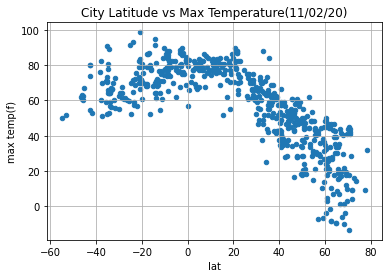

In [43]:
#Y is Max Temperature(F), X is Latitude
#Title: City Latitude vs Max Temperature(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="max temp(f)", grid=True,
               title = "City Latitude vs Max Temperature(11/02/20)")

plt.savefig("Images/lat_vs_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

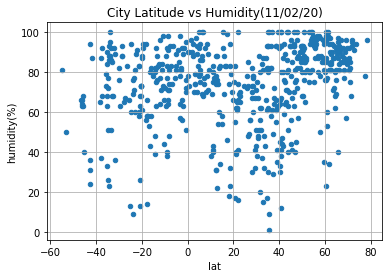

In [44]:
#Y is Humidity(%), X is Latitude
#Title: City Latitude vs Humidity(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="humidity(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

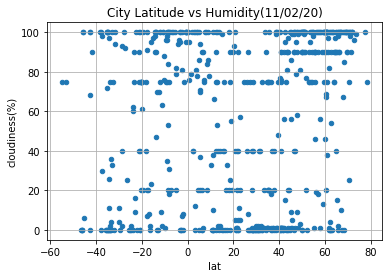

In [45]:
#Y is Cloudiness(%), X is Latitude
#Title: City Latitude vs Cloudiness(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="cloudiness(%)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

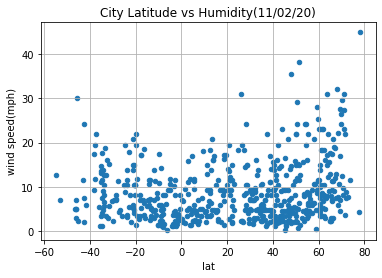

In [46]:
#Y is Wind Speed(mph), X is Latitude
#Title: City Latitude vs Wind Speed(11/02/20)
cities_df.plot(kind="scatter",x="lat",y="wind speed(mph)", grid=True,
               title = "City Latitude vs Humidity(11/02/20)")

plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8472449278109959


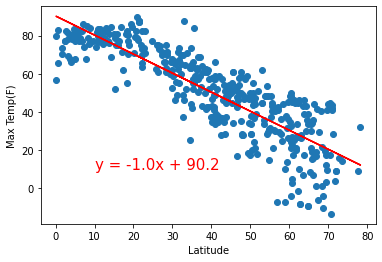

In [48]:
#Y is Max Temp, X is Latitude >=0
#The r-value is: rvalue
n_hem = cities_df.loc[cities_df["lat"]>=0,:]
x_values=n_hem["lat"]
y_values=n_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_tempLR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.515988008972533


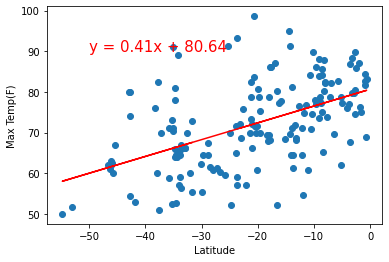

In [50]:
#Y is Max Temp, X is Latitude <=0
#The r-value is: rvalue
s_hem = cities_df.loc[cities_df["lat"]<=0,:]
x_values=s_hem["lat"]
y_values=s_hem["max temp(f)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_tempLR.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.25909390049358266


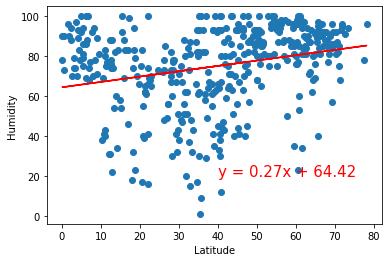

In [51]:
x_values=n_hem["lat"]
y_values=n_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_humidityLR.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1670447302976351


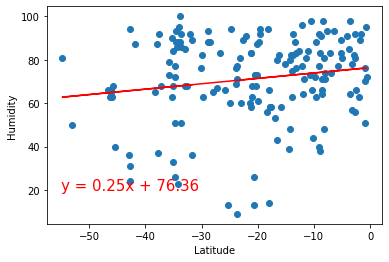

In [52]:
x_values=s_hem["lat"]
y_values=s_hem["humidity(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_humidityLR.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2984115260732783


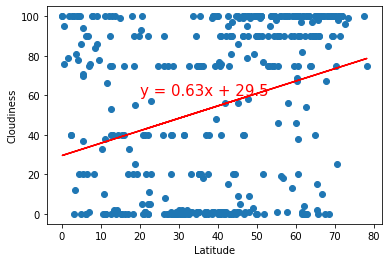

In [53]:
x_values=n_hem["lat"]
y_values=n_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_cloudinessLR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20766469828375725


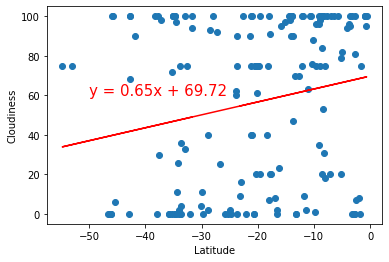

In [54]:
x_values=s_hem["lat"]
y_values=s_hem["cloudiness(%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_cloudinessLR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.27006413585316236


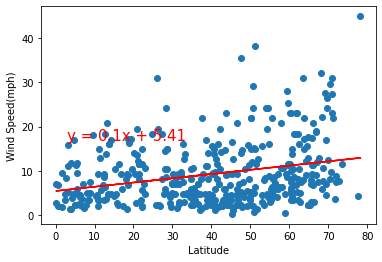

In [55]:
x_values=n_hem["lat"]
y_values=n_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/NHlat_vs_windspeedLR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3082017127911389


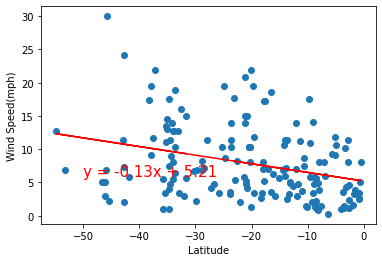

In [56]:
x_values=s_hem["lat"]
y_values=s_hem["wind speed(mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("Images/SHlat_vs_windspeedLR.png")
plt.show()